In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

# 1. 데이터 생성
 - 남자, 여자 데이터 생성 후 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [22]:
random.randint(40, 70)  # 40~70 중 무작위 수 하나

61

In [58]:
data = []
for i in range(50):
    data.append([random.randint(40, 70),  random.randint(140, 175)])  # 여자 데이터
    data.append([random.randint(60, 110), random.randint(170, 200)])  # 남자 데이터

In [59]:
# 여자
for female in data[:100:2]:  # 0번째부터 99번째까지 짝수 데이터만
    print(female, end=' ')
print('\n============================================================')
# 남자
for male in data[1:100:2]:  # 1번째부터 99번째까지 홀수 데이터만
    print(male, end=' ')

[51, 149] [64, 167] [68, 168] [40, 159] [53, 167] [48, 160] [53, 169] [55, 148] [54, 141] [47, 142] [59, 173] [62, 166] [56, 152] [48, 175] [41, 148] [64, 164] [41, 153] [47, 165] [62, 143] [63, 161] [40, 146] [44, 163] [60, 143] [65, 156] [56, 149] [58, 147] [56, 171] [47, 155] [61, 173] [42, 152] [60, 142] [45, 170] [43, 154] [68, 161] [63, 163] [50, 158] [59, 161] [66, 145] [62, 140] [50, 141] [55, 159] [41, 163] [61, 156] [62, 170] [46, 151] [50, 146] [50, 152] [65, 154] [47, 143] [69, 169] 
[109, 172] [61, 183] [81, 200] [98, 196] [60, 191] [73, 199] [99, 173] [83, 195] [76, 188] [65, 171] [68, 186] [109, 198] [61, 173] [105, 178] [67, 193] [95, 179] [75, 179] [62, 198] [93, 194] [81, 191] [79, 175] [97, 173] [89, 187] [66, 177] [89, 194] [73, 191] [60, 172] [75, 186] [85, 192] [106, 180] [99, 198] [95, 187] [101, 177] [102, 176] [75, 173] [90, 175] [62, 175] [80, 191] [63, 189] [75, 175] [87, 177] [104, 186] [99, 183] [110, 174] [98, 191] [76, 188] [104, 197] [86, 189] [105, 187]

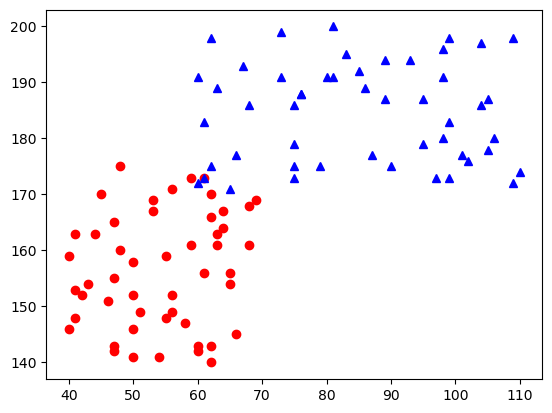

In [60]:
# x : 몸무게, y : 키
# print('여자 몸무게(x) : ', [d[0]for d in data[:100:2]])
# print('여자 신장(y) : ',   [d[1]for d in data[:100:2]])
# print('남자 몸무게(x) : ', [d[0]for d in data[1:100:2]])
# print('남자 신장(y) : ',   [d[1]for d in data[1:100:2]])
plt.plot([d[0]for d in data[:100:2]],
         [d[1]for d in data[:100:2]], 'o', color='r')
plt.plot([d[0]for d in data[1:100:2]],
         [d[1]for d in data[1:100:2]], '^', color='b')
plt.show()

# 2. 군집화 로직

In [75]:
# 초기 랜덤 지점 2개 생성 (40~110, 140~200)
random_points = [[random.randint(40, 110), random.randint(140, 200)],
                 [random.randint(40, 110), random.randint(140, 200)]]
print('초기 랜덤 기준점 : ', random_points)  # list

초기 랜덤 기준점 :  [[91, 155], [51, 198]]


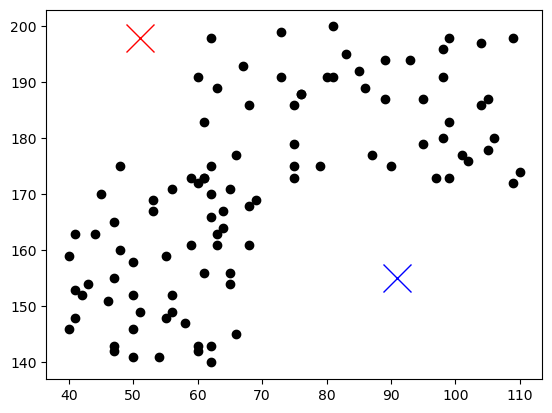

In [88]:
# 여자 남자 전체 데이터
# plt.plot([d[0] for d in data], [d[1] for d in data], 'o', color='k')
for x in data:
    plt.plot(x[0], x[1], 'o', color='k')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)

In [89]:
# 두 점 사이의 거리를 return하는 함수 (random_points[0] random_points[1] 나누기 위함) a=[0, 0] ~ b=[3, 4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)  # np.sqrt() : 루트
dist((1, 1), [4, 5])  # 튜플, 리스트 가능

5.0

In [90]:
dist(np.array([1, 1]), [4, 5])

5.0

In [91]:
dist(random_points[0], random_points[1])

58.728187440104094

In [92]:
# random_points[0]과 random_points[1]을 기준으로 두 영역을 나눔
group0 = []  # random_points[0]이 더 가까운 group
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(60, 40)

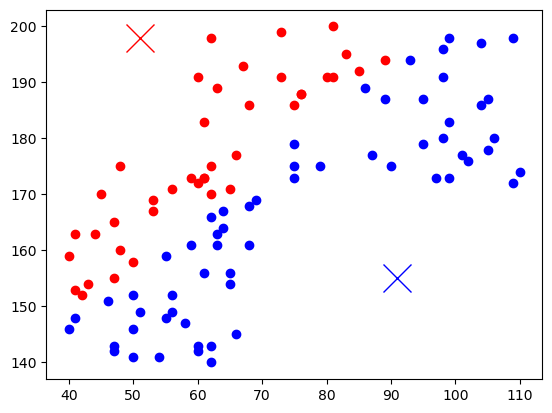

In [95]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')  # group0의 x축, y축
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')  # group1의 x축, y축

In [100]:
print('초기 랜덤 지점 : ', random_points)
# group0의 중심점과 group1의 중심점으로 만들어진 new_points
sumX = 0
sumY = 0
for g in group0:
    sumX += g[0]  # x축 값 누적
    sumY += g[1]  # y축 값 누적
new_points = []   # 새로운 기준점
new_points.append([sumX / len(group0), sumY / len(group0)])  # group0의 중간지점

sumX = 0
sumY = 0
for g in group1:
    sumX += g[0]
    sumY += g[1]
new_points.append([sumX / len(group1), sumY / len(group1)])  # group1의 중간지점

print('새로운 기준점 : ', new_points)

초기 랜덤 지점 :  [[91, 155], [51, 198]]
새로운 기준점 :  [[75.31666666666666, 166.36666666666667], [61.175, 176.825]]


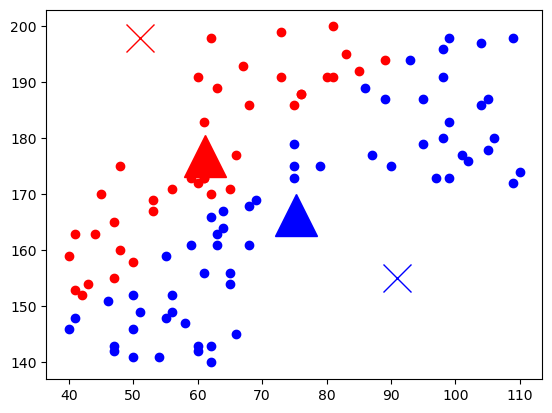

In [102]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')  # group0의 x축, y축
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')  # group1의 x축, y축

plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=30)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=30)

In [103]:
# new_points[0]과 new_points[1]을 기준으로 두 영역을 나눔
group0 = []  # new_points[0]이 더 가까운 group
group1 = []
for d in data:
    if dist(new_points[0], d) < dist(new_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(52, 48)

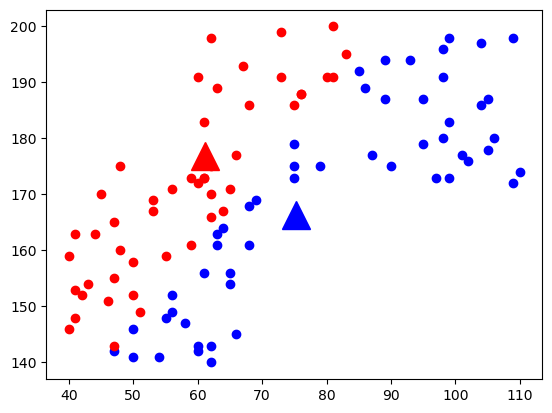

In [111]:
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=20)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=20)

# 3. 전체코드(for문 사용)

1 번째 기준점 :  [[107, 185], [43, 159]]
2 번째 기준점 :  [[90.74358974358974, 185.74358974358975], [54.80327868852459, 160.34426229508196]]
3 번째 기준점 :  [[88.85714285714286, 185.95238095238096], [54.310344827586206, 158.8793103448276]]
4 번째 기준점 :  [[86.73913043478261, 185.69565217391303], [53.55555555555556, 157.09259259259258]]
5 번째 기준점 :  [[85.91666666666667, 185.33333333333334], [53.03846153846154, 156.32692307692307]]
6 번째 기준점 :  [[85.91666666666667, 185.33333333333334], [53.03846153846154, 156.32692307692307]]
7 번째 기준점 :  [[85.91666666666667, 185.33333333333334], [53.03846153846154, 156.32692307692307]]
8 번째 기준점 :  [[85.91666666666667, 185.33333333333334], [53.03846153846154, 156.32692307692307]]
9 번째 기준점 :  [[85.91666666666667, 185.33333333333334], [53.03846153846154, 156.32692307692307]]
10 번째 기준점 :  [[85.91666666666667, 185.33333333333334], [53.03846153846154, 156.32692307692307]]


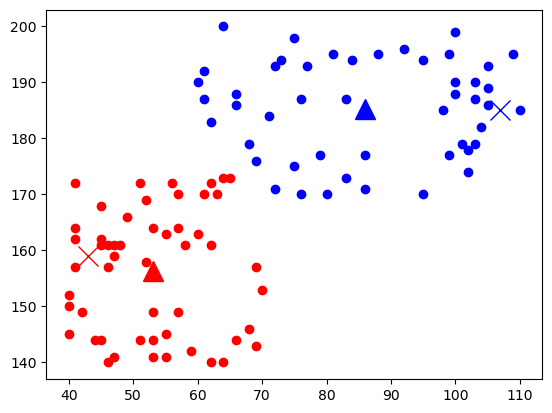

In [130]:
# 두 점 사이의 거리를 return하는 함수 (random_points[0] random_points[1] 나누기 위함) a=[0, 0] ~ b=[3, 4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)  # np.sqrt() : 루트
data = []
for i in range(50):
    data.append([random.randint(40, 70),  random.randint(140, 175)])  # 여자 데이터
    data.append([random.randint(60, 110), random.randint(170, 200)])  # 남자 데이터

points = [[random.randint(40, 110), random.randint(140, 200)],
          [random.randint(40, 110), random.randint(140, 200)]]
plt.plot(points[0][0], points[0][1], 'x', color='b', markersize=15)
plt.plot(points[1][0], points[1][1], 'x', color='r', markersize=15)

for i in range(1, 11):
    print(i, '번째 기준점 : ', points)
    group0 = []
    group1 = []
    for d in data:
        if dist(points[0], d) <= dist(points[1], d):
            group0.append(d)
        else:
            group1.append(d)
    sumX = 0
    sumY = 0
    points = []  # 덮어씌우기 위함
    for g in group0:
        sumX += g[0]
        sumY += g[1]
    points.append([sumX / len(group0), sumY / len(group0)])  # group0들의 중심점
    sumX = 0
    sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points.append([sumX / len(group1), sumY / len(group1)])  # group1들의 중심점
    # 6번째 기준점으로부터 기준점이 나뉨
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(points[0][0], points[0][1], '^', color='b', markersize=15)
plt.plot(points[1][0], points[1][1], '^', color='r', markersize=15)
plt.show()

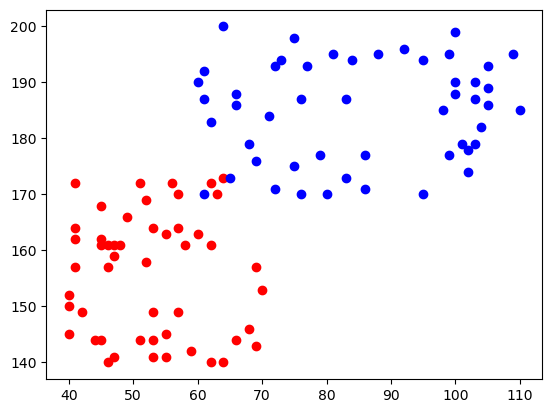

In [132]:
plt.plot([d[0] for d in data[:100:2]],  [d[1] for d in data[:100:2]],  'o', color='r')  # 여자 몸무게, 키
plt.plot([d[0] for d in data[1:100:2]], [d[1] for d in data[1:100:2]], 'o', color='b')  # 남자 몸무게, 키
plt.show()

# 4. api(sklean)를 이용한 군집분석
 - sklearn : 머신러닝 패키지

In [135]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2,     # 2개 그룹으로 군집분석
               init='random',    # 초기값
               n_init=10,        # 10회
               random_state=42)  # 시드값
model.fit(data)

C:\Users\4545\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [136]:
model.cluster_centers_  # 최종 중심점

array([[ 85.91666667, 185.33333333],
       [ 53.03846154, 156.32692308]])

In [138]:
model.labels_  # 여자 : 1그룹

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [144]:
model.predict(np.array([[99, 199],
                        [50, 160]]))

array([0, 1])

In [148]:
model.labels_ == 1  # True : 1그룹인 여자 데이터만

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False])

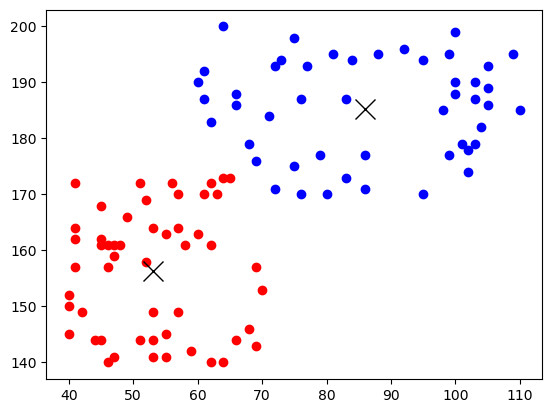

In [161]:
# print('model의 1번 group의 x값 : \n', data[model.labels_ == 1, 0])  # 여자 몸무게
# print('model의 1번 group의 y값 : \n', data[model.labels_ == 1, 1])  # 여자 키
# print('model의 0번 group의 x값 : \n', data[model.labels_ == 0, 0])  # 남자 몸무게
# print('model의 0번 group의 y값 : \n', data[model.labels_ == 0, 1])  # 남자 키

plt.plot(data[model.labels_ == 1, 0], data[model.labels_ == 1, 1], 'o', color='r')
plt.plot(data[model.labels_ == 0, 0], data[model.labels_ == 0, 1], 'o', color='b')
plt.plot(model.cluster_centers_[0][0], model.cluster_centers_[0][1], 'x', color='k', markersize=15)
plt.plot(model.cluster_centers_[1][0], model.cluster_centers_[1][1], 'x', color='k', markersize=15)